

# Project: Why 20% People Does Not Show in Medical Appointment?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset**:this data collects 100K medical appointments in Brazil and it is focused on whether patients show up in their appointmnet or not. Information is collected as the following:
>
>> PatientId: ID of patient
>> AppointmentID: ID of appointment   
>> Gender            
>> ScheduledDay: the Date patient set up their appointment    
>> AppointmentDay: the Date patient visit doctor   
>> Age: patient's age             
>> Neighbourhood: location of hosipital    
>> Scholarship: Brazil benifit provide to low income family       
>> Hipertension: patient's sympton    
>> Diabetes: patient's sympton          
>> Alcoholism: patient's sympton         
>> Handcap: patient's sympton           
>> SMS_received: whether received SMS reminder regarding appointmnet      
>> No-show: yes for no-show and no for show        
>

> **Questions**:Potential questions to answer:
>
>> 1. Is no show event correlated with gender?
>> 
>> 2. Is longer schduled day vs appointment day gap correlated with higher no-show events?         
>




In [41]:
# Use this cell to set up import statements for all of the packages 
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [43]:
# Load in dataset in same folder and inspect data with types and missing data inforamtion:

df=pd.read_csv("noshowappointments2.csv")
print (df.info())

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [47]:
# this is a large dataset, duplicated is checked to make data is tidy
sum(df.duplicated())

0

In [48]:
# two rows with almost the same input starting from column['Gender'].  However, these two should still considered as diferent rows
# as the patientID is different. 
df.iloc[[51,52]]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
51,4.694699e+13,5534635,F,2016-03-31 17:05:31,2016-04-29,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
52,7.987570e+14,5534639,F,2016-03-31 17:06:17,2016-04-29,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes


<a id='Oberservation'></a>

## Observation
>  This dataset has no missing data siince all columns have same amount of rows.



### Data Cleaning (Convert datetime column type and clean unnecessary columns)

In [49]:
# convert 'ScheduledDay' and 'AppointmentDay' column into datetime type
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [50]:
# extract only date information from these two columns to calculate the date difference between scheduled date and appointment date
df['Scheduled']=df['ScheduledDay'].dt.date
df['Appointment']=df['AppointmentDay'].dt.date

# calculate day difference and create a new column as 'DateGap'

df['DateGap']=(df['Appointment']-df['Scheduled']).dt.days

#remove rows with scheduled date later than appointment date
df=df[df['DateGap']>=0]


In [51]:
# dropping unnecessary columns
df.drop(['AppointmentDay','ScheduledDay','AppointmentID','PatientId','Scheduled','Appointment'],axis=1, inplace=True)

In [52]:
# once after data cleaning, without patientID, when checking duplicated, there are over 30k duplicated rows

#this should be due to conversioinr removal of PatientId, appointmentID column
sum(df.duplicated())

32265

In [53]:
df[df.duplicated()]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DateGap
52,F,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes,29
99,F,1,BONFIM,0,0,0,0,0,0,No,0
110,F,34,SANTO ANTÔNIO,0,0,0,0,0,1,No,17
154,F,30,ITARARÉ,0,0,0,0,0,0,No,1
210,F,47,SANTOS DUMONT,0,0,0,0,0,0,No,3
308,M,2,SANTA MARTHA,0,0,0,0,0,0,No,0
310,M,0,SANTA MARTHA,0,0,0,0,0,0,No,0
344,F,23,SÃO CRISTÓVÃO,1,0,0,1,0,0,No,0
365,M,1,CONSOLAÇÃO,0,0,0,0,0,1,Yes,29
369,F,39,PRAIA DO CANTO,0,0,0,0,0,0,No,0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Is gender correlated with No-show event?)

In [54]:
df[(df['Age']==1) & (df['DateGap']== 0)& (df['Neighbourhood']=='CONQUISTA')]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DateGap
66,M,1,CONQUISTA,0,0,0,0,0,0,No,0
75225,M,1,CONQUISTA,0,0,0,0,0,0,No,0
75474,M,1,CONQUISTA,0,0,0,0,0,0,No,0
80612,F,1,CONQUISTA,0,0,0,0,0,0,No,0
82562,M,1,CONQUISTA,0,0,0,0,0,0,No,0
89507,M,1,CONQUISTA,0,0,0,0,0,0,No,0
93954,F,1,CONQUISTA,0,0,0,0,0,0,No,0


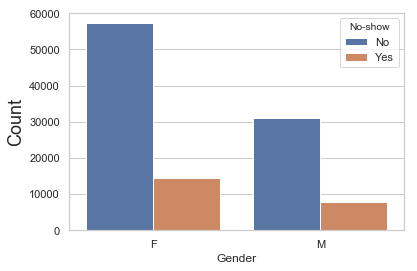

In [55]:
# Use countplot to find out how many show vs no-show in different gender

sns.set(style="whitegrid")
sns.countplot(x=df['Gender'], hue=df['No-show'])
plt.ylabel('Count', size=18)

In [ ]:
df['Gender'].duplicated()

<a id='Oberservation'></a>

## Observation
> It is hard to tell the ratio of no-show in different gender by looking at exact number


In [110]:
# Use groupby to calculate each scenario percentage, prepare data table for barplot below
Genderdf=df['No-show'].groupby(df['Gender']).value_counts(normalize=True).rename('GenderProp').reset_index()
Genderdf

,Gender,No-show,GenderProp
0,F,No,0.796887
1,F,Yes,0.203113
2,M,No,0.800362
3,M,Yes,0.199638


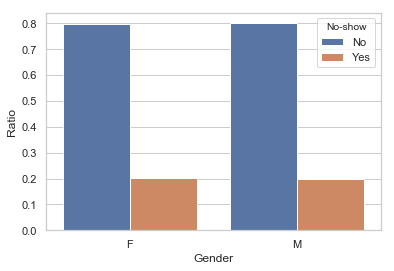

In [89]:
sns.barplot(x='Gender', y='GenderProp', hue='No-show', data=Genderdf)
plt.ylabel('Ratio')

<a id='Oberservation'></a>

## Observation
>In female, there is very slighter higher chance to no-show in scheduled docctor appoinment. But ratio between female and male is very close

### Research Question 2  (Is longer schduled day vs appointment day gap correlated with higher no-show events? )

(array([8.6534e+04, 1.7303e+04, 3.8340e+03, 2.0180e+03, 5.5800e+02,
        1.6100e+02, 3.4000e+01, 2.3000e+01, 1.2000e+01, 4.5000e+01]),
 array([  0. ,  17.9,  35.8,  53.7,  71.6,  89.5, 107.4, 125.3, 143.2,
        161.1, 179. ]),
 <a list of 10 Patch objects>)

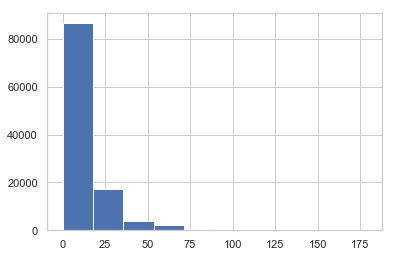

In [112]:
# Visualize dategap distribution
plt.hist(df['DateGap'])

In [113]:
# Convert DateGap into four different categories based on histogram above: '0-20 days', '20-50 days','50-100 days', '100-200 days'
# Create new column 'DateGap_bins'
bin_edges=[-1,20,50,100,200]
bin_names=['0-20 days', '20-50 days','50-100 days', '100-200 days']
df['DateGap_bins']=pd.cut(df['DateGap'], bin_edges, labels=bin_names)


In [105]:
# Use groupby to calculate each scenario percentage (No-show vs DateGap-bins), prepare data table for barplot below
DateGap_df=df['No-show'].groupby(df['DateGap_bins']).value_counts(normalize=True).rename('DateGap_prop').reset_index()
DateGap_df

,DateGap_bins,No-show,DateGap_prop
0,0-20 days,No,0.827211
1,0-20 days,Yes,0.172789
2,100-200 days,No,0.702899
3,100-200 days,Yes,0.297101
4,20-50 days,No,0.667708
5,20-50 days,Yes,0.332292
6,50-100 days,No,0.696321
7,50-100 days,Yes,0.303679


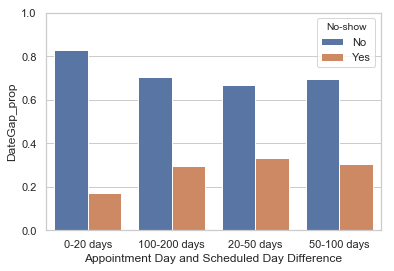

In [108]:
# visualize above table into barplot
sns.barplot(x='DateGap_bins', y='DateGap_prop', hue='No-show', data=DateGap_df)
plt.ylim(0,1)
plt.xlabel('Appointment Day and Scheduled Day Difference')

<a id='Oberservation'></a>

## Observation
>  longer appointment day and scheduled day diffence tend to have higher no show events. This ratio peak at 20-50 day gap but start to decrease when this gap become longer than 50 days.

<a id='conclusions'></a>
## Conclusions

> In this file, i peformed following on the dateset:
1. Data review: check on data type and find no missing data in given dataset
2. Data cleaning: convert date related columns into date time type; add additional column to represent scheduled day and appiontment day difference; remove rows with scheduled date later than appointment date; remove unnessary columns.
3. Exploratory data analsis: based on two questions, visualize dataset to find correlation between no-show vs gender, no-show vs sheducle day and appointment day gap
4. Conlusions: 
> 
>> - Female has a slightly higher chance to no shown in a scheduled doctor appointment.
>>
>
>> - Longer appointment day and scheduled day diffence tend to have higher no show events. This ratio peak at 20-50 day gap but start to decrease when this gap become longer than 50 days.
>>
>